# Control theory and Vicsek Model - Studying the states of flocks

# Import libraries

In [117]:
# General imports
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from IPython.display import Video, display

In [118]:
# Module imports
import models.vicsek as vicsek
import visualisation as visualisation
import utils
import animation.Animator2D as Animator2D
import animation.MatplotlibAnimator as MatplotlibAnimator

# Launching a simulation 

In [119]:
# Initialize the Vicsek model.
radius = 1
L = 5
N = 10


In [120]:
simulator = vicsek.Vicsek(numberOfParticles=N, domainSize=(L, L), radius=radius, speed=0.3)
# Simulate the Vicsek model.
simulationData = simulator.simulate(dt = 1, tmax=500)

# Extract the simulation data.
# time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]

In [121]:
df = utils.simulationDataToDataframe(simulationData)
df.head()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_5,theta_y_5,theta_x_6,theta_y_6,theta_x_7,theta_y_7,theta_x_8,theta_y_8,theta_x_9,theta_y_9
0,0.0,30.091224,11.242668,4.738338,47.539139,38.082649,1.134602,37.057338,35.399000,41.299983,...,0.895686,0.444687,-0.906057,0.423155,0.628990,-0.777414,-0.680604,0.732652,0.417143,-0.908841
1,1.0,29.865095,11.439811,4.443541,47.483506,38.365786,1.035439,36.767547,35.321405,41.593659,...,0.966324,0.257327,-0.531370,0.847140,0.556442,-0.830887,-0.758909,0.651197,0.460496,-0.887662
2,2.0,29.679092,11.675189,4.147754,47.533606,38.652212,0.946221,36.495708,35.194505,41.874237,...,0.999971,-0.007589,-0.781552,0.623841,-0.201296,-0.979530,-0.826938,0.562293,0.629921,-0.776659
3,3.0,29.556257,11.948889,3.856416,47.462036,38.946410,0.887503,36.256559,35.375635,42.103785,...,0.999738,0.022877,-0.847198,0.531277,-0.579354,-0.815076,-0.779568,0.626318,0.162740,-0.986669
4,4.0,29.530680,12.247797,3.572788,47.364288,39.246196,0.876188,36.053648,35.596604,42.213723,...,0.988908,0.148526,-0.743799,0.668403,-0.629903,-0.776674,-0.571752,0.820427,-0.196857,-0.980432


# Plotting clusters over time 

In [122]:
start = 0 # Start ITERATION
end = 150 # End ITERATION
df2 = df.loc[start:end]
df2.tail()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_5,theta_y_5,theta_x_6,theta_y_6,theta_x_7,theta_y_7,theta_x_8,theta_y_8,theta_x_9,theta_y_9
146,146.0,34.037550,46.082476,43.705738,8.217018,39.465513,39.245903,19.692660,14.835776,2.291340,...,0.866886,0.498507,-0.187360,0.982291,-0.529931,0.848041,-0.976988,-0.213295,0.808831,0.588041
147,147.0,33.795352,45.905444,44.001676,8.266218,39.742486,39.130640,19.529719,15.087669,2.008139,...,0.864362,0.502870,-0.329169,0.944271,-0.357558,0.933891,-0.897032,-0.441966,0.789304,0.614003
148,148.0,33.578800,45.697826,44.276996,8.385378,39.995575,38.969562,19.343104,15.322563,1.713666,...,0.965381,0.260842,0.071520,0.997439,-0.604885,0.796313,-0.863289,-0.504709,0.846427,0.532504
149,149.0,33.467026,45.419426,44.575567,8.356126,40.293186,38.931771,19.336739,15.622495,1.427832,...,0.575709,0.817655,0.162786,0.986661,-0.097169,0.995268,-0.998380,0.056889,0.838513,0.544881
150,150.0,33.405745,45.125752,44.875258,8.369725,40.568052,38.811569,19.270834,15.915166,1.134310,...,0.856231,0.516592,0.052929,0.998598,-0.201122,0.979566,-0.897057,0.441914,0.839801,0.542894


In [123]:
from matplotlib import animation 

In [124]:

# pas très intéressant

# HIST_BINS = np.arange(-1, N, 1)
# HIST_RANGE = (-1, N)

# # Animation of the clustering distribution over time
# fig, ax = plt.subplots()
# ax.set_xlim(-1, 10)
# ax.set_ylim(0, 1)
# ax.set_xlabel('Cluster size')
# ax.set_ylabel('Frequency')
# ax.set_title('Cluster size distribution over time')
# ax.hist(matLabels[0], bins=HIST_BINS, range=HIST_RANGE, density=True, histtype='step', color='b', lw=2)

# def animate(i):
#     ax.clear()
#     ax.set_xlim(-1, 10)
#     ax.set_ylim(0, 1)
#     ax.set_xlabel('Cluster size')
#     ax.set_ylabel('Frequency')
#     ax.set_title('Cluster size distribution over time')
#     ax.hist(matLabels[i], bins=HIST_BINS, range=HIST_RANGE, density=True, histtype='step', color='b', lw=2)
#     return ax

# ani = animation.FuncAnimation(fig, animate, frames=t)
# ani.save('cluster_size_distribution.mp4', writer='ffmpeg', fps=10)

## Cluster of bird over time 

In [125]:
df_labels = utils.clusters_over_time(df, k_coef=2, L=L, min_samples=4)
df_labels.to_csv('data/vicsek_labels.csv', index=False)

In [126]:
matLabels = df_labels.to_numpy()
color = []
for i, labels in enumerate(matLabels):
    color.append( utils.coloring_clusters(labels, cmap_name='hsv') )
color = np.array(color)
color.shape

c:\Users\nicos\OneDrive\Bureau\MAIN4\Stage\vicsek_control_theory\utils.py:212: RuntimeWarning: divide by zero encountered in long_scalars
  colors = cmap(labels+1 / max(labels+1))


(501, 10, 4)

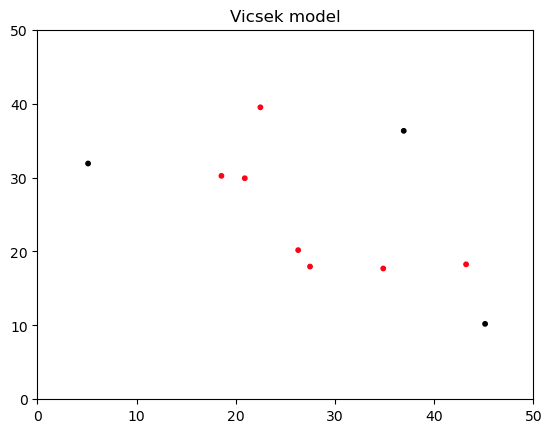

In [127]:
time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]
# plot simulation 
fig, ax = plt.subplots()

def animate(i):
    x, y = positions[i, :, 0], positions[i, :, 1]
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_title('Vicsek model')

    ax.scatter(x, y, c=color[i], cmap='hsv', s=10)
    return ax

ani = animation.FuncAnimation(fig, animate, frames = len(time))
ani.save('data/vicsek_model_normal.mp4', writer='ffmpeg', fps=20)

In [128]:
# Alphanumeric heuristic # 
def permute(line): 

    max = int(np.max(line))
    min = int(np.min(line)) 
    UNVISITED = -2
    permutation = np.zeros((max-min+1)) + UNVISITED
    for i in range(len(line)): 
        if permutation[int(line[i]-min)] == UNVISITED:
            permutation[int(line[i]-min)] = line[i]
        else :
            line[i] = permutation[int(line[i]-min)]
    return line



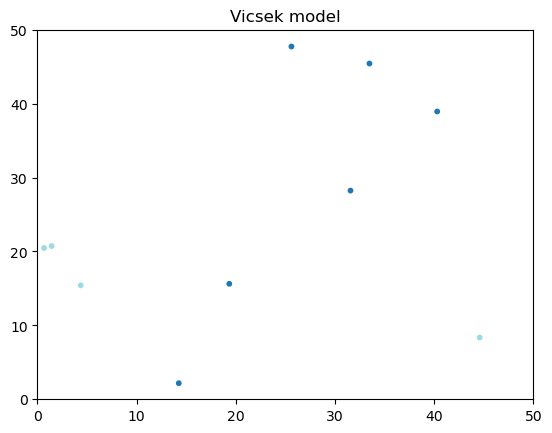

In [129]:
time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]
# plot simulation 
fig, ax = plt.subplots()
matLabels = df_labels.to_numpy()
def animate(i):
    x, y = positions[i, :, 0], positions[i, :, 1]
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_title('Vicsek model')
    col = permute(matLabels[i])
    ax.scatter(x, y, c=col, cmap='tab20', s=10)
    return ax

ani = animation.FuncAnimation(fig, animate, frames=end-start)
ani.save('data/vicsek_model_alphanum.mp4', writer='ffmpeg', fps=20)

2
2


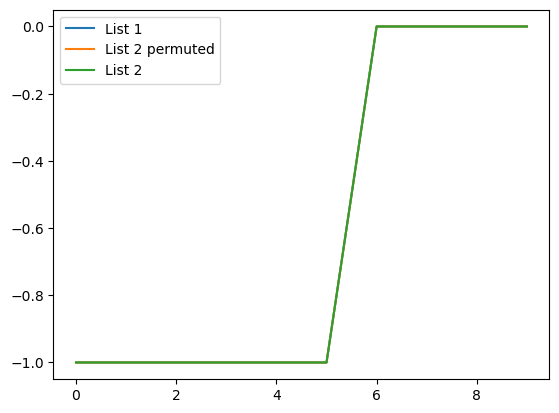

In [130]:
import numpy as np
from scipy.optimize import linear_sum_assignment

def minimize_difference_with_ignore(list1, list2, ignore_value=-1):
    # Convertir les listes en tableaux numpy
    list1 = np.array(list1)
    list2 = np.array(list2)
    
    # Trouver les indices des éléments à ignorer
    valid_indices = (list1 != ignore_value) & (list2 != ignore_value)
    
    # Extraire les éléments valides
    list1_valid = list1[valid_indices]
    list2_valid = list2[valid_indices]
    
    # Calculer la matrice de coût pour les éléments valides
    cost_matrix = np.abs(list1_valid[:, np.newaxis] - list2_valid[np.newaxis, :])
    
    # Trouver l'affectation optimale utilisant l'algorithme hongrois
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    
    # Appliquer la permutation optimale aux éléments valides de list2
    list2_permuted_valid = list2_valid[col_ind]
    
    # Reconstituer la liste permutée en réintégrant les valeurs ignorées
    list2_permuted = np.copy(list2)
    list2_permuted[valid_indices] = list2_permuted_valid
    
    return list2_permuted, col_ind

# Exemple d'utilisation
list1 = matLabels[0].astype(int)
list2 = matLabels[1].astype(int)

print(len(set(list1)))
print(len(set(list2)))

list2_permuted, permutation_indices = minimize_difference_with_ignore(list1, list2)
# print("List1:", list1)
# print("List2:", list2)
# print("List2 permuted:", list2_permuted)
# print("Permutation indices:", permutation_indices)

fig, ax = plt.subplots()
ax.plot(np.sort(list1), label='List 1')
ax.plot(np.sort(list2_permuted), label='List 2 permuted')
ax.plot(np.sort(list2), label='List 2')
ax.legend()
plt.show()
